# Francesco Iaccarino, KAGGLE USERNAME: Francesco Iaccarino 3170051


### Importing all the necessary stuff

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
train = pd.read_csv("/Users/francescoiaccarino/Desktop/Università/Jupyter notebook/Folders/train.csv")
test = pd.read_csv("/Users/francescoiaccarino/Desktop/Università/Jupyter notebook/Folders/test_updated.csv")
poi = pd.read_csv("/Users/francescoiaccarino/Desktop/Università/Jupyter notebook/Folders/poi.csv", low_memory = False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/francescoiaccarino/Desktop/Università/Jupyter notebook/Folders/train.csv'

### Explanatory analysis

In [4]:
train.head()

,id,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
0,10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
1,51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
2,33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
3,62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
4,45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46312 entries, 0 to 46311
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   46312 non-null  int64  
 1   price                46312 non-null  int64  
 2   balcony              30869 non-null  object 
 3   conditions           45083 non-null  object 
 4   construction_year    32366 non-null  float64
 5   latitude             46299 non-null  float64
 6   longitude            46299 non-null  float64
 7   energy_efficiency    26409 non-null  float64
 8   expenses             30158 non-null  float64
 9   floor                44281 non-null  float64
 10  garden               14783 non-null  object 
 11  n_bathrooms          43896 non-null  float64
 12  elevator             28869 non-null  float64
 13  total_floors         27963 non-null  float64
 14  n_rooms              45959 non-null  float64
 15  proximity_to_center  46299 non-null 

In [6]:
train.describe()

,id,price,construction_year,latitude,longitude,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
count,46312.000000,4.631200e+04,32366.000000,46299.000000,46299.000000,2.640900e+04,30158.000000,44281.000000,43896.000000,28869.000000,27963.000000,45959.000000,46299.000000,45869.000000
mean,32960.756132,5.031879e+05,1958.032874,43.534743,11.451295,5.091382e+03,195.285132,2.033333,1.559140,0.952510,5.724207,3.284166,0.994756,114.866620
std,19090.178152,1.106504e+06,72.021035,1.789416,1.502453,7.600521e+05,4035.008418,2.175668,0.769869,0.212689,191.115233,1.329654,0.030093,88.650549
min,0.000000,1.540000e+02,1000.000000,41.690300,9.060775,1.000000e-02,0.000000,-5.000000,1.000000,0.000000,1.000000,1.000000,0.588014,0.000000
25%,16466.500000,1.990000e+05,1950.000000,41.882400,9.221300,1.590000e+02,40.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,68.000000
50%,32906.500000,3.150000e+05,1967.000000,41.960604,12.361864,1.750000e+02,80.000000,2.000000,1.000000,1.000000,4.000000,3.000000,1.000000,91.000000
75%,49489.250000,5.150000e+05,1987.000000,45.465800,12.487604,1.750000e+02,150.000000,3.000000,2.000000,1.000000,6.000000,4.000000,1.000000,130.000000
max,66159.000000,7.200000e+07,2500.000000,45.561298,12.854100,1.234570e+08,346000.000000,56.000000,9.000000,1.000000,31960.000000,9.000000,1.000000,990.000000


In [7]:
count = train.isnull().sum().sort_values(ascending = True)
percentage = train.isnull().mean().sort_values(ascending = True)
missing_data = pd.concat([count, percentage], axis = 1, keys = ['count', 'percentage'])
missing_data

,count,percentage
id,0,0.000000
price,0,0.000000
proximity_to_center,13,0.000281
longitude,13,0.000281
latitude,13,0.000281
n_rooms,353,0.007622
surface,443,0.009566
conditions,1229,0.026537
floor,2031,0.043855
n_bathrooms,2416,0.052168


In [8]:
count2 = test.isnull().sum().sort_values(ascending = True)
percentage2 = (test.isnull().mean().sort_values(ascending = True))
missing_data2 = pd.concat([count, percentage], axis = 1, keys = ['count', 'percentage'])
missing_data2

,count,percentage
id,0,0.000000
price,0,0.000000
proximity_to_center,13,0.000281
longitude,13,0.000281
latitude,13,0.000281
n_rooms,353,0.007622
surface,443,0.009566
conditions,1229,0.026537
floor,2031,0.043855
n_bathrooms,2416,0.052168


### Definition of the functions that will perform some data cleaning 

 #### Now I am going to drop the values having a percentage of missing values > 60% and the id feature

In [9]:
id_train, id_test = train.id, test.id

def traintest_drop(df):
    df.drop(missing_data[missing_data['percentage'] > 0.60].index, axis = 1, inplace = True)
    df.drop(['id'], axis = 1, inplace = True)
    return df

#### I am defining the functions that will perform null imputation through linear regressions, mode and median

In [10]:
def linear_regression(df, target, predictor1, predictor2 = None, predictor3 = None):
    train_ = df.dropna(subset = [target])
    test_ = df[df[target].isnull()].copy()
    
    LinearRegr = LinearRegression()
    if (predictor2 == None and predictor3 == None):
        LinearRegr.fit(train_[[predictor1]], train_[target])
        prediction = LinearRegr.predict(test_[[predictor1]])
    elif predictor3 == None:
        LinearRegr.fit(train_[[predictor1, predictor2]], train_[target])
        prediction = LinearRegr.predict(test_[[predictor1, predictor2]])
    else:
        LinearRegr.fit(train_[[predictor1, predictor2, predictor3]], train_[target])
        prediction = LinearRegr.predict(test_[[predictor1, predictor2, predictor3]])
        
    index = df[target].isnull()
    df.loc[index, target] = prediction
    
    return df

In [11]:
def traintest_subs(df):
    cols_median = ['latitude', 'longitude', 'expenses', 'floor', 'energy_efficiency', 'n_rooms', 'surface']
    cols_mode = ['construction_year', 'proximity_to_center', 'balcony', 'elevator']
    
    df[cols_median] = df[cols_median].fillna(df[cols_median].median())
    df[cols_mode] = df[cols_mode].fillna(df[cols_mode].mode().iloc[0])
    
    return df

#### I am defining the functions that will perform standardization 

In [12]:
def traintest_standardize(df):
    
    numeric_cols = ['energy_efficiency', 'expenses', 'surface']
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

#### Now I am going to substitute the categorical variable conditions as a dummy variable, divided in cols  

In [13]:
def traintestdum(df):
    dum = pd.get_dummies(df.conditions, dtype = int)
    df = df.join(dum)
    df.drop('conditions', axis = 1, inplace = True)
    return df

### Running the modifications on the dataframe 

In [14]:
train = traintest_drop(train)
train = traintest_subs(train)
train = linear_regression(train, 'n_bathrooms', 'surface', 'n_rooms')
train = linear_regression(train, 'total_floors', 'floor')
train = traintestdum(train)

In [15]:
# train = traintest_standardize(train)

In [16]:
test = traintest_drop(test)
test = traintest_subs(test)
test = linear_regression(test, 'n_bathrooms', 'surface', 'n_rooms')
test = linear_regression(test, 'total_floors', 'floor')
test = traintestdum(test)

In [17]:
# test = traintest_standardize(test)

In [18]:
correlations1 = train.corr()['price'].sort_values(ascending=False)
correlations2 = train.corr()['floor'].sort_values(ascending=False)
correlations3 = train.corr()['n_bathrooms'].sort_values(ascending=False)

### Feature engineering 

#### I am going to create a feature called comfortability 

In [19]:
train['comfortability'] = ((train['floor'] > 3) & (train['elevator'] == 1)).astype(np.float64)
test['comfortability'] = ((test['floor'] > 3) & (test['elevator'] == 1)).astype(np.float64)

In [20]:
train['bathroom_per_room'] = train['n_bathrooms'] / train['n_rooms']
test['bathroom_per_room'] = test['n_bathrooms'] / test['n_rooms']

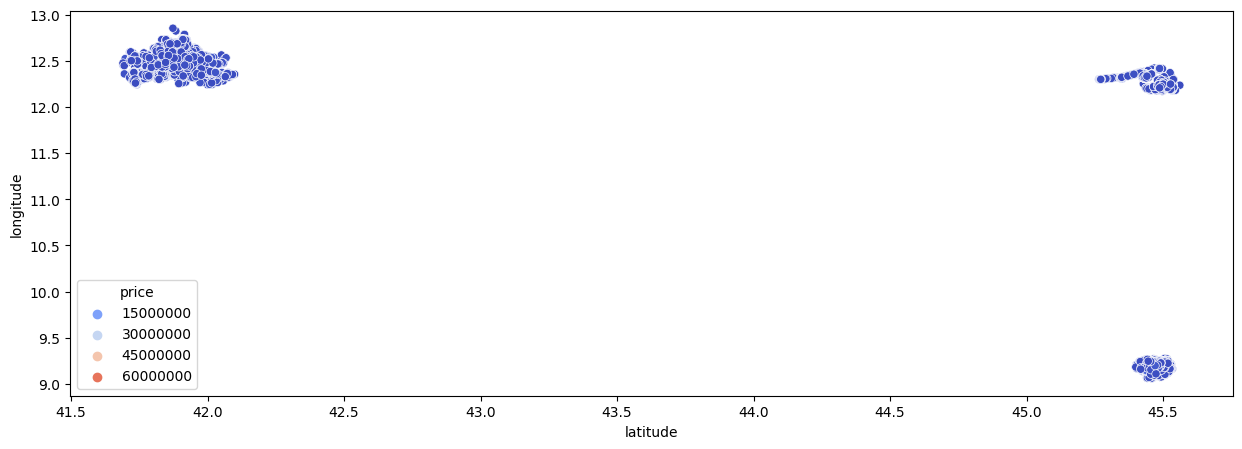

In [21]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "latitude", y = "longitude", data = train, hue = 'price', palette = "coolwarm");

In [22]:
train_location_data = train[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(train_location_data)
train['desirability'] = kmeans.predict(train[['latitude', 'longitude']])

test_location_data = test[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(test_location_data)
test['desirability'] = kmeans.predict(test[['latitude', 'longitude']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
milan_lat, milan_lon = 45.4642, 9.1900
venice_lat, venice_lon = 45.4408, 12.3155
rome_lat, rome_lon = 41.9028, 12.4964

def which_city(lat, lon, city_lat, city_lon, tol):
    return abs(lat - city_lat) < tol and abs(lon - city_lon) < tol

def MilRomVen(df):
    tol = 0.36
    
    df['Milan'] = df.apply(lambda x: 1 if which_city(x['latitude'], x['longitude'], milan_lat, milan_lon, tol) else 0, axis=1)
    df['Venice'] = df.apply(lambda x: 1 if which_city(x['latitude'], x['longitude'], venice_lat, venice_lon, tol) else 0, axis=1)
    df['Rome'] = df.apply(lambda x: 1 if which_city(x['latitude'], x['longitude'], rome_lat, rome_lon, tol) else 0, axis=1)

    df.drop(['latitude', 'longitude'], axis=1, inplace=True)
    return df

### Data visualization

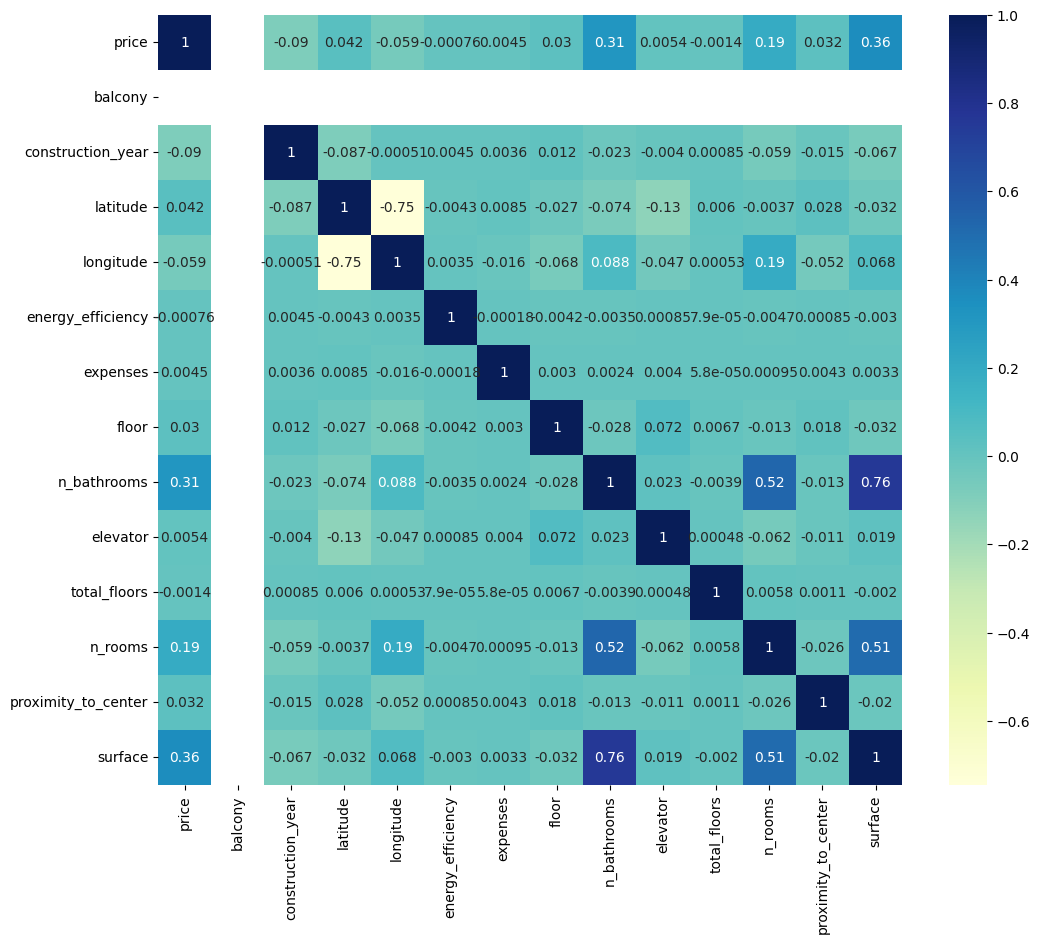

In [23]:
correlation_matrix = train.corr().iloc[:14, :14]
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu");

#### Checking for outliers - scatterplots

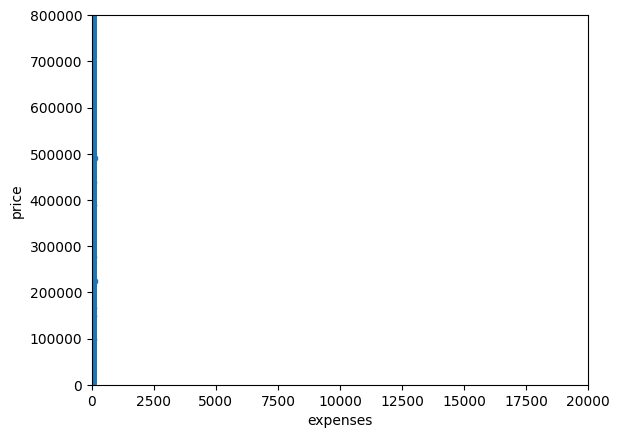

In [30]:
var = 'expenses'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000))
plt.xlim(0, 20000)
plt.ylim(0, None)

plt.show();

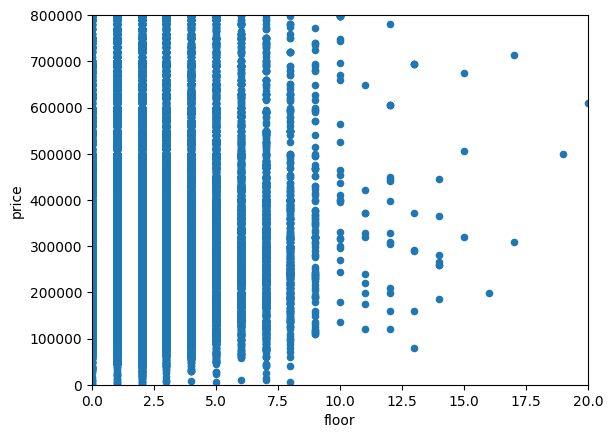

In [31]:
var = 'floor'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000))
plt.xlim(0, 20)
plt.ylim(0, None)

plt.show();

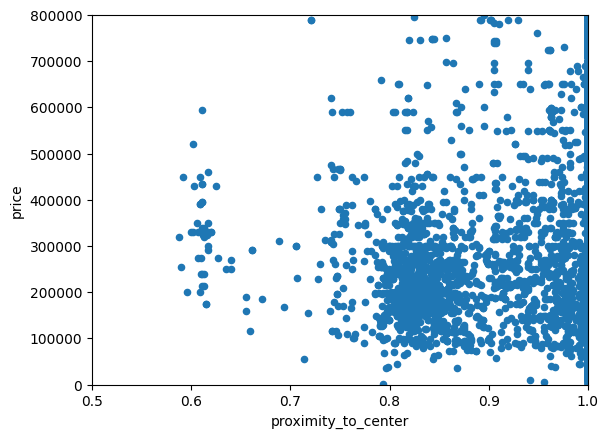

In [32]:
var = 'proximity_to_center'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000))
plt.xlim(0.5, 1.0)
plt.ylim(0, None)
 
plt.show();

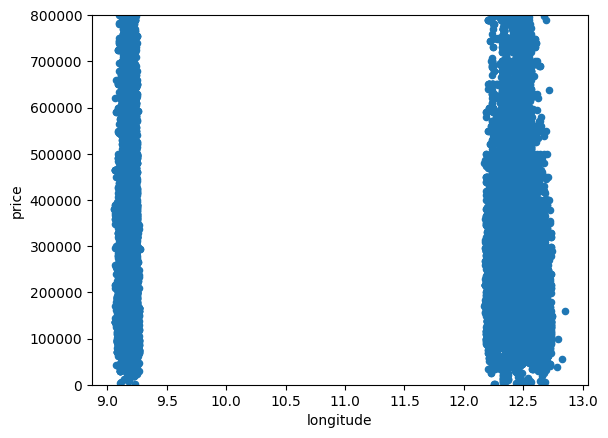

In [33]:
var = 'longitude'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000))
plt.xlim(None, None)
plt.ylim(0, None)
 
plt.show();

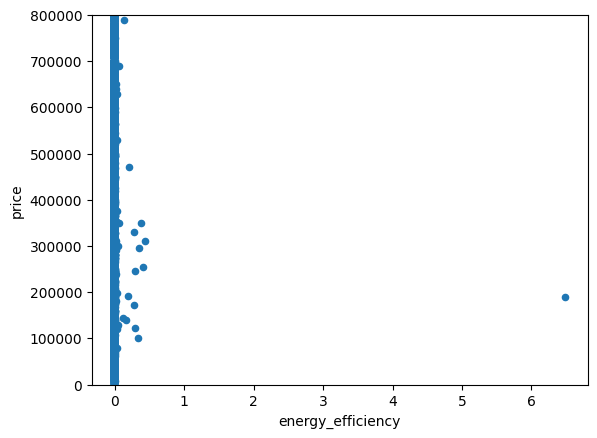

In [34]:
var = 'energy_efficiency'
data = pd.concat([train['price'], train[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,800000))
plt.xlim(None, None)
plt.ylim(0, None)
 
plt.show();

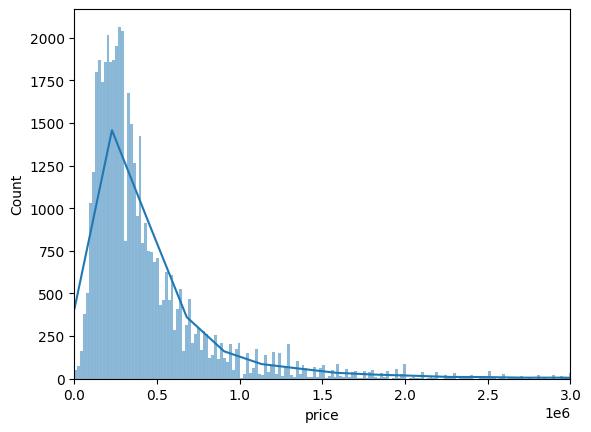

In [35]:
sns.histplot(data=train, x="price", kde=True)
plt.xlim(0, 3000000)
plt.ylim(0, None)
 
plt.show();

### Now I am going to drop outliers 

In [24]:
sorted_price = train['price'].sort_values()
train = train[(train['price'] >= sorted_price.iloc[3]) & (train['price'] <= sorted_price.iloc[-4])]

In [25]:
sorted_expenses = train['expenses'].sort_values()
train = train[(train['expenses'] >= sorted_expenses.iloc[6]) & (train['expenses'] <= sorted_expenses.iloc[-4])]

In [26]:
train = train[train['surface'] != 0]

In [27]:
train = train[train['total_floors'] < train['total_floors'].sort_values().iloc[-1]]

In [28]:
train = train[train['construction_year'] < train['construction_year'].sort_values().iloc[-1]]

In [29]:
train = train[train['energy_efficiency'] < train['energy_efficiency'].sort_values().iloc[-1]]

## Model running 1

In [30]:
X, y = train.drop('price', axis = 1), train['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 51)

### Random Forest run

In [31]:
RndForest = RandomForestRegressor(max_depth=2, random_state=42)
RndForest.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [32]:
pred_rnd_forest = RndForest.predict(X_test)

#### Cross validation on Random Forest 

In [33]:
from sklearn.model_selection import cross_val_score

val_score = RndForest.score(X_train, y_train)
cv_scores = cross_val_score(RndForest, X, y, cv=5)

print("Validation score:", val_score)
print("Cross-validation scores:", cv_scores)

Validation score: 0.2465251965129277
Cross-validation scores: [0.25677665 0.1750791  0.21743327 0.22202477 0.26188031]


In [34]:
train_score = RndForest.score(X_train, y_train)
print("Training score:", train_score)

Training score: 0.2465251965129277


In [46]:
importances = RndForest.feature_importances_
pd.DataFrame({"col":X.columns, "importances":importances})

,col,importances
0,balcony,0.000000
1,construction_year,0.009707
2,latitude,0.000000
3,longitude,0.000812
4,energy_efficiency,0.000000
5,expenses,0.000000
6,floor,0.000619
7,n_bathrooms,0.007829
8,elevator,0.000000
9,total_floors,0.011227


### Random Forest with PCA

In [47]:
pipe = Pipeline([('pca', PCA(n_components=5)),
                 ('rf', RandomForestRegressor(random_state = 42))])
pipe.fit(X_train, y_train)

pred_pca = pipe.predict(X_test)

### Grid Search on Random Forest

In [35]:
rf = RandomForestRegressor(random_state = 65)

from sklearn.model_selection import GridSearchCV, KFold

p_grid = {"max_depth": [2,3,4,5,6,7]}
inner_cv = KFold(n_splits=5, shuffle=True, random_state=65)
reg = GridSearchCV(rf, param_grid = p_grid, cv=inner_cv)

reg.fit(X_train, y_train)

pred_gs = reg.predict(X_test)

In [36]:
pred_gs

array([ 330374.03109168,  524813.1445692 ,  317404.38053567, ...,
        304749.33261425,  382280.14579587, 1127123.83519203])

### Grid Search with other hyperparameters to tune, more expensive in terms of computational cost

In [37]:
# rnd_for = RandomForestRegressor(random_state=65)

# p_grid = {
#    'max_depth': [2, 3, 4, 5, 6, 7],
#    'n_estimators': [50, 100, 150],
#    'min_samples_split': [2, 4, 6],
#    'min_samples_leaf': [1, 2, 4],
# }

# inner_cv = KFold(n_splits=5, shuffle=True, random_state=65)
# regr = GridSearchCV(rnd_for, param_grid=p_grid, cv=inner_cv)

# regr.fit(X_train, y_train)

# pred_ext_gs = regr.predict(X_test)

In [ ]:
# pred_ext_gs

### Cross validation on Random Forest with Grid Search

In [37]:
val_score = reg.score(X_train, y_train)
cv_scores = cross_val_score(reg, X, y, cv=5)

print("Validation score:", val_score)
print("Cross-validation scores:", cv_scores)

Validation score: 0.6734328184080626
Cross-validation scores: [0.3981828  0.33706244 0.32249424 0.36334966 0.34463595]


In [38]:
train_score = reg.score(X_train, y_train)
print("Training score:", train_score)

Training score: 0.6734328184080626


### Comparison among models via MSE

In [36]:
mean_squared_error(y_test, pred_gs)

511460784656.99133

In [37]:
mean_squared_error(y_test, pred_rnd_forest)

664253813411.5586

In [54]:
mean_squared_error(y_test, pred_pca)

747299658815.2574

In [55]:
# 1st 529117527787.3757
# 2nd 539224937933.0266
# 3rd 317572728461.1593
# 4th 155566395015.6269

# 5th 885590287548.2153
# 6th 832264896071.518  

# 7th 881929329754.9994
# 8th 817826285523.6781

# 9th 660440157517.1202
# 10th 581068215431.4183

# 11th 685079491522.0686
# 12th 664650796782.5577

## To .csv 1

In [37]:
XX_test = test

In [38]:
#Y_pred = RndForest.predict(XX_test)
#Y_pred

In [39]:
Y_pred = reg.predict(XX_test)
Y_pred

array([226583.07118601, 227732.54818377, 910447.92481883, ...,
       401058.81072583, 213842.44477443, 227732.54818377])

In [40]:
output = pd.DataFrame({'id': id_test, 'price': Y_pred})
output

,id,price
0,18825,226583.071186
1,30956,227732.548184
2,47193,910447.924819
3,27799,348726.649255
4,22259,251279.730246
...,...,...
19783,22961,496631.086835
19784,4606,406676.911755
19785,6106,401058.810726
19786,35370,213842.444774


In [41]:
output.to_csv('outputnew.csv', index = False)

## Model running 2

In [61]:
train = MilRomVen(train)
test = MilRomVen(test)

In [62]:
test

,balcony,construction_year,energy_efficiency,expenses,floor,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,...,Buono stato / Abitabile,Da ristrutturare,Nuovo / Nuova costruzione,Ottimo / Ristrutturato,comfortability,expense_per_surface,desirability,Milan,Venice,Rome
0,True,2010.0,-0.016292,-0.039555,3.0,1.000000,1.0,5.000000,2.0,1.000000,...,0,0,1,0,0.0,0.082224,1,0,0,1
1,True,1900.0,-0.016292,-0.039778,0.0,1.000000,1.0,3.000000,2.0,1.000000,...,1,0,0,0,0.0,0.064623,2,0,1,0
2,True,1960.0,-0.016292,-0.021986,-1.0,3.000000,0.0,2.695243,3.0,1.000000,...,1,0,0,0,0.0,-0.078260,0,1,0,0
3,True,1962.0,-0.014259,-0.021986,6.0,1.469499,1.0,6.000000,3.0,1.000000,...,1,0,0,0,1.0,0.115892,2,0,1,0
4,True,2006.0,-0.016292,-0.025322,4.0,2.000000,1.0,4.000000,3.0,1.000000,...,1,0,0,0,1.0,0.070771,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19783,True,1980.0,-0.016292,-0.028658,3.0,2.000000,1.0,7.000000,4.0,1.000000,...,1,0,0,0,0.0,-0.127421,1,0,0,1
19784,True,1960.0,-0.016292,-0.021986,2.0,1.000000,0.0,4.415368,2.0,1.000000,...,1,0,0,0,0.0,-0.386954,2,0,1,0
19785,True,1960.0,-0.016292,-0.021986,0.0,2.000000,1.0,6.000000,3.0,1.000000,...,1,0,0,0,0.0,0.669719,1,0,0,1
19786,True,1970.0,-0.016292,-0.028658,1.0,1.000000,1.0,3.000000,3.0,1.000000,...,0,0,0,1,0.0,0.039387,1,0,0,1


In [63]:
train_milan = train[train['Milan'] == 1].drop(['Rome','Venice'], axis = 1)
train_venice = train[train['Venice'] == 1].drop(['Milan','Rome'], axis = 1)
train_rome = train[train['Rome'] == 1].drop(['Milan','Venice'], axis = 1)

In [64]:
X_m, y_m = train_milan.drop('price', axis=1), train_milan['price']
X_r, y_r = train_rome.drop('price', axis=1), train_rome['price']
X_v, y_v = train_venice.drop('price', axis=1), train_venice['price']

In [65]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.33, random_state = 42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.33, random_state = 42)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_v, y_v, test_size=0.33, random_state = 42)

In [66]:
rf_milan = RandomForestRegressor(n_estimators=100, random_state=42)   # Here I am training random forest on Milan data
rf_milan.fit(X_train_m, y_train_m)

rf_venice = RandomForestRegressor(n_estimators=100, random_state=42)  # Here I am training random forest on Venice data
rf_venice.fit(X_train_v, y_train_v)

rf_rome = RandomForestRegressor(n_estimators=100, random_state=42)    # Here I am training random forest on Rome data
rf_rome.fit(X_train_r, y_train_r)

RandomForestRegressor(random_state=42)

In [67]:
# test_milan = test[test['Milan'] == 1].drop(['Rome','Venice'], axis = 1)
# test_venice = test[test['Venice'] == 1].drop(['Milan','Rome'], axis = 1)
# test_rome = test[test['Rome'] == 1].drop(['Milan','Venice'], axis = 1)

# Make predictions on each of the test dataframes using the corresponding random forest
pred_milan = rf_milan.predict(X_test_m)
pred_venice = rf_venice.predict(X_test_v)
pred_rome = rf_rome.predict(X_test_r)

prediction_cities = np.concatenate((pred_milan, pred_venice, pred_rome), axis = 0)
y_test_cities = np.concatenate((y_test_m, y_test_v, y_test_r), axis = 0)

### MSE

In [68]:
mean_squared_error(y_test_cities, prediction_cities)

639045150363.7021

## To .csv 2

In [69]:
XX_test_m = test[test['Milan'] == 1].drop(['Rome','Venice'], axis = 1)
XX_test_v = test[test['Venice'] == 1].drop(['Milan','Rome'], axis = 1)
XX_test_r = test[test['Rome'] == 1].drop(['Milan','Venice'], axis = 1)

In [70]:
test.insert(0, 'id', id_test, allow_duplicates=False)

test_m_id = test[test['Milan'] == 1].iloc[:, 0]
test_v_id = test[test['Venice'] == 1].iloc[:, 0]
test_r_id = test[test['Rome'] == 1].iloc[:, 0]

In [71]:
Y_pred_m = rf_milan.predict(XX_test_m)
Y_pred_v = rf_venice.predict(XX_test_v)
Y_pred_r = rf_rome.predict(XX_test_r)

In [72]:
Y_pred_m

array([ 581315.        ,  325591.        ,  461983.33333333, ...,
       1142030.        ,  273510.        ,  231060.        ])

In [73]:
prediction_city = np.concatenate((Y_pred_m, Y_pred_v, Y_pred_r), axis = 0)
ids = np.concatenate((test_m_id, test_v_id, test_r_id), axis = 0)

In [74]:
output = pd.DataFrame({'id': ids, 'price': prediction_city})
output

,id,price
0,47193,5.813150e+05
1,42190,3.255910e+05
2,50303,4.619833e+05
3,34920,5.503600e+05
4,58714,3.847625e+05
...,...,...
19783,43102,4.755764e+05
19784,22961,1.469635e+06
19785,6106,5.623479e+05
19786,35370,2.087100e+05


In [75]:
output.describe()

,id,price
count,19788.000000,1.978800e+04
mean,33365.088589,5.859468e+05
std,19116.407515,6.595508e+05
min,2.000000,5.605875e+04
25%,16763.500000,2.619682e+05
50%,33446.500000,4.011574e+05
75%,49934.250000,6.286094e+05
max,66154.000000,1.150027e+07


In [76]:
#output.to_csv('outputnew.csv', index = False)